# The dataset

https://monashdatafluency.github.io/python-workshop-base/fullday/

### Objective

* Importing library
* Reading file as DataFrame
* Creating DataFrame from list/array
* Exploring dataset
* Indexing data
* Filtering
* Sorting
* Basic statistical analysis

In [25]:
import urllib.request
# You can also get this URL value by right-clicking the `surveys.csv` link above and selecting "Copy Link Address"
url = 'https://monashdatafluency.github.io/python-workshop-base/modules/data/surveys.csv'
# url = 'https://goo.gl/9ZxqBg'  # or a shortened version to save typing
urllib.request.urlretrieve(url, 'surveys.csv')

('surveys.csv', <http.client.HTTPMessage at 0x7f20791f38d0>)

In [46]:
ls  # prints files in the directory/folder

 cli_tutorial.txt                 'Intro to R.odt'   surveys.csv
 Data_Analysis_with_python.ipynb  'Intro to R.pdf'


In [47]:
import pandas as pd
pd.__version__      # version check

'0.25.1'

In [48]:
# !pip install pandas       # conda brew preferred installer program

# Reading CSV file

In [49]:
# Note that pd.read_csv is used because we imported pandas as pd
pd.read_csv("surveys.csv")

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [50]:
#pd.re<Tab>
# pd.read_  

In [51]:
pd.read_csv?

In [56]:
# From documentation, we know we can read  data from url
surveys_df= pd.read_csv(url)  # Instead of downloading file, you can directly read using url

In [57]:
surveys_df

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


# Exploring Our Species Survey Data

In [58]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
site_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [59]:
type(surveys_df)

pandas.core.frame.DataFrame

In [60]:
pd.core.frame.DataFrame?

In [61]:
# you can also create dataframe from any 2D data
# 3 Explaination
d = {'one' : [1., 2., 3.,4.],'two' : [1., 2., 3., 4.]}
#df_tmp = pd.DataFrame(data=d)  # default index
df_tmp = pd.DataFrame(data=d, index=['a', 'b', 'c', 'd'])
df_tmp

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,4.0,4.0


# Challenge - DataFrames

Using our DataFrame surveys_df, try out the attributes & methods below to see what they return.

1. surveys_df.columns
2. surveys_df.shape Take note of the output of shape - what format does it return the shape of the DataFrame in? HINT: More on tuples, here.
3. surveys_df.head() Also, what does surveys_df.head(15) do?
4. surveys_df.tail()


In [62]:
# This is not the scope of today workshop
class Person:
    def __init__(self, name):
        self.name = name           # attributes
    
    def greet(self):
        print( "Hi! " + self.name +"!")
        

p = Person("Mike")
p.name  # attributes

p.greet()   # method or function

Hi! Mike!


In [63]:
# Solutions
# 1. get the column names
surveys_df.columns   # df.keys()  

Index(['record_id', 'month', 'day', 'year', 'site_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [64]:
# 2. 
surveys_df.shape

(35549, 9)

In [65]:
# 3. veiw first 5 rows
surveys_df.head()
# df.head(15)

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [66]:
# 4. view bottom 5 rows
surveys_df.tail()

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


# Indexing data frames

### extracting columns

In [67]:
# 1. single column   
surveys_df.record_id    # df['record_id']  benefits: 1. column names with spaces 2. multiple columns
surveys_df['record_id']

0            1
1            2
2            3
3            4
4            5
         ...  
35544    35545
35545    35546
35546    35547
35547    35548
35548    35549
Name: record_id, Length: 35549, dtype: int64

In [68]:
type(surveys_df['record_id'])

pandas.core.series.Series

In [69]:
# Read multiple coulmn
surveys_df[["site_id","hindfoot_length"]]  # Now we know it takes list as argument, we can further improved it as:

,site_id,hindfoot_length
0,2,32.0
1,3,33.0
2,2,37.0
3,7,36.0
4,3,35.0
...,...,...
35544,15,NaN
35545,15,NaN
35546,10,15.0
35547,7,36.0


In [70]:
#list
#cols = surveys_df.columns
#surveys_df[[cols[3],cols[4]]] # or surveys_df[cols[2:5]]
cols = surveys_df.columns
surveys_df[cols[2:5]]     # will extract 2, 3 4 cols

,day,year,site_id
0,16,1977,2
1,16,1977,3
2,16,1977,2
3,16,1977,7
4,16,1977,3
...,...,...,...
35544,31,2002,15
35545,31,2002,15
35546,31,2002,10
35547,31,2002,7


### Extracting rows

In [71]:
#iloc= integer, loc=label, idx=both, hybrid
surveys_df.iloc[0:5]   # 0 to length-1, will extract 0 to 5-1=4 rows

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [72]:
surveys_df.iloc[0][3]  # surveys_df_tmp.iloc -> error

1977

In [73]:
surveys_df.loc[0:2]   
# df_tmp.iloc['a':'c']    see the label see the difference, try to read the documentation,see the difference between
# iloc and loc.

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN


In [74]:
# SKIP IT
# surveys_df.ix?  # Skip it for now

In [75]:
# Iterate through df rows
#df.iterrows?
for index, row in surveys_df.iterrows():
    if index < 5: # means printing 0 to 4 rows
        print(index, row)

0 record_id             1
month                 7
day                  16
year               1977
site_id               2
species_id           NL
sex                   M
hindfoot_length      32
weight              NaN
Name: 0, dtype: object
1 record_id             2
month                 7
day                  16
year               1977
site_id               3
species_id           NL
sex                   M
hindfoot_length      33
weight              NaN
Name: 1, dtype: object
2 record_id             3
month                 7
day                  16
year               1977
site_id               2
species_id           DM
sex                   F
hindfoot_length      37
weight              NaN
Name: 2, dtype: object
3 record_id             4
month                 7
day                  16
year               1977
site_id               7
species_id           DM
sex                   M
hindfoot_length      36
weight              NaN
Name: 3, dtype: object
4 record_id             5
month     

# Sorting

In [76]:
surveys_df.sort_values(['year'])  # by default it will sort in ascending order

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
343,344,10,18,1977,3,NL,NaN,NaN,NaN
342,343,10,18,1977,21,PF,NaN,NaN,NaN
341,342,10,18,1977,16,DM,M,34.0,25.0
340,341,10,18,1977,5,DS,M,50.0,NaN
...,...,...,...,...,...,...,...,...,...
34063,34064,5,16,2002,3,PP,F,23.0,18.0
34064,34065,5,16,2002,3,DO,M,36.0,32.0
34065,34066,5,16,2002,3,DO,M,37.0,29.0
34059,34060,5,16,2002,3,DM,M,36.0,55.0


In [77]:
# We can also sort in descending order by passing second argument
surveys_df.sort_values(['year'], ascending=[0])

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN
34060,34061,5,16,2002,3,PB,M,27.0,37.0
34066,34067,5,16,2002,3,DM,F,36.0,50.0
34065,34066,5,16,2002,3,DO,M,37.0,29.0
34064,34065,5,16,2002,3,DO,M,36.0,32.0
...,...,...,...,...,...,...,...,...,...
341,342,10,18,1977,16,DM,M,34.0,25.0
342,343,10,18,1977,21,PF,NaN,NaN,NaN
343,344,10,18,1977,3,NL,NaN,NaN,NaN
344,345,11,12,1977,22,DM,F,34.0,45.0


In [78]:
# Sorting based on multiple columns, 
surveys_df.sort_values(['weight','year'], ascending=[0,1]) # 0 - False, 1 = True

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
33048,33049,11,17,2001,12,NL,M,33.0,280.0
12870,12871,5,28,1987,2,NL,M,32.0,278.0
15458,15459,1,11,1989,9,NL,M,36.0,275.0
2132,2133,10,25,1979,2,NL,F,33.0,274.0
12728,12729,4,26,1987,2,NL,M,32.0,270.0
...,...,...,...,...,...,...,...,...,...
35530,35531,12,31,2002,13,PB,F,27.0,NaN
35543,35544,12,31,2002,15,US,NaN,NaN,NaN
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN


# Logical indexing & Data Filtering

In [79]:
import numpy as np
numbers = np.array([1,2,3,4,5])

numbers > 3  # will output a numpy array, similar to list, with bunch of true and false values.

array([False, False, False,  True,  True])

In [80]:
numbers[numbers>3]  # it will filter out the numbers greater than 3

array([4, 5])

In [81]:
# Let's implement this concept to do filting on our actual data
surveys_df[surveys_df.year==2000] # filter the data for year==2000, == means comparision while = means assignments

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
30158,30159,1,8,2000,1,PP,F,22.0,17.0
30159,30160,1,8,2000,1,DO,M,35.0,53.0
30160,30161,1,8,2000,1,PP,F,21.0,17.0
30161,30162,1,8,2000,1,DM,M,36.0,50.0
30162,30163,1,8,2000,1,PP,M,20.0,16.0
...,...,...,...,...,...,...,...,...,...
31705,31706,12,23,2000,15,OT,F,21.0,25.0
31706,31707,12,23,2000,15,OT,M,20.0,19.0
31707,31708,12,23,2000,5,NaN,NaN,NaN,NaN
31708,31709,12,23,2000,10,NaN,NaN,NaN,NaN


In [82]:
# similarly we can pass multiple conditions, let's try to filter all the 2000 year data for female species.
surveys_df[(surveys_df.year == 2000) & (surveys_df.sex=='F') ]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
30158,30159,1,8,2000,1,PP,F,22.0,17.0
30160,30161,1,8,2000,1,PP,F,21.0,17.0
30164,30165,1,8,2000,1,PP,F,22.0,15.0
30168,30169,1,8,2000,2,PB,F,25.0,24.0
30171,30172,1,8,2000,2,NL,F,30.0,137.0
...,...,...,...,...,...,...,...,...,...
31699,31700,12,23,2000,13,PB,F,25.0,32.0
31701,31702,12,23,2000,13,PB,F,26.0,32.0
31702,31703,12,23,2000,14,DM,F,34.0,NaN
31704,31705,12,23,2000,14,DM,F,35.0,39.0


In [83]:
# Let's add one more condition for weight, now we want to extract data for year=2000 of female 
# species having weight greater that 100
surveys_df[(surveys_df.year == 2000) & (surveys_df.sex=='F') & (surveys_df.weight > 100)]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
30171,30172,1,8,2000,2,NL,F,30.0,137.0
30173,30174,1,8,2000,2,NL,F,33.0,181.0
30203,30204,1,8,2000,20,NL,F,35.0,174.0
30306,30307,2,5,2000,2,NL,F,33.0,185.0
30307,30308,2,5,2000,2,NL,F,31.0,144.0
30494,30495,3,4,2000,20,NL,F,35.0,160.0
30495,30496,3,4,2000,20,NL,F,34.0,208.0
30500,30501,3,5,2000,3,NL,F,32.0,171.0
30740,30741,6,3,2000,2,NL,F,33.0,158.0
30781,30782,6,3,2000,20,NL,F,33.0,170.0


# Calculating Statistics From Data

In [84]:
# How many species we have?
surveys_df['species_id'].unique()     # shape, size both works

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

In [85]:
surveys_df.hindfoot_length.min()

2.0

In [86]:
surveys_df.hindfoot_length.max()

70.0

In [87]:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

In [88]:
surveys_df['weight'].min()
surveys_df['weight'].max()
surveys_df['weight'].mean()
surveys_df['weight'].std()
# only the last command shows output below - you can try the others above in new cells
surveys_df['weight'].count()

32283

In [89]:
# try to run describe() on surveys_df and see the output. 
surveys_df.describe()  # this time got statistics for each columns

,record_id,month,day,year,site_id,hindfoot_length,weight
count,35549.000000,35549.000000,35549.000000,35549.000000,35549.000000,31438.000000,32283.000000
mean,17775.000000,6.474022,16.105966,1990.475231,11.397001,29.287932,42.672428
std,10262.256696,3.396583,8.256691,7.493355,6.799406,9.564759,36.631259
min,1.000000,1.000000,1.000000,1977.000000,1.000000,2.000000,4.000000
25%,8888.000000,4.000000,9.000000,1984.000000,5.000000,21.000000,20.000000
50%,17775.000000,6.000000,16.000000,1990.000000,11.000000,32.000000,37.000000
75%,26662.000000,9.000000,23.000000,1997.000000,17.000000,36.000000,48.000000
max,35549.000000,12.000000,31.000000,2002.000000,24.000000,70.000000,280.000000


# Challenge - Statistics

1. Create a list of unique site ID's found in the surveys data. Call it site_names. How many unique sites are there in the data? How many unique species are in the data?

2. What is the difference between len(site_names) and surveys_df['site_id'].nunique()?



In [90]:
# Solutions
# 1. 
site_names = surveys_df['site_id'].unique()
site_names

len(site_names)

24

In [91]:
surveys_df['site_id'].nunique()

24

In [92]:
# 2. 
len(site_names) # total number of unique site
surveys_df['site_id'].nunique()   # list of nunique site, TRY to see the difference between unique() and nunique()

24

# Groups in Pandas

In [93]:
# Group data by sex
grouped_data = df.groupby('sex')

In [94]:
# let's see the type of grouped_data
type(grouped_data)

pandas.core.groupby.generic.DataFrameGroupBy

In [95]:
pd.core.groupby.generic.DataFrameGroupBy?

In [96]:
type(grouped_data.count())  # now it returns DataFrame Object, perform normal operations to access data

pandas.core.frame.DataFrame

In [97]:
grouped_data.count()

,record_id,month,day,year,site_id,species_id,hindfoot_length,weight
sex,,,,,,,,
F,15690,15690,15690,15690,15690,15690,14894,15303
M,17348,17348,17348,17348,17348,17348,16476,16879


In [98]:
grouped_data.count()['site_id']

sex
F    15690
M    17348
Name: site_id, dtype: int64

In [99]:
# Summary statistics for all numeric columns by sex
grouped_data.describe()

record_id                                                               \
        count          mean           std  min      25%      50%       75%   
sex                                                                          
F     15690.0  18036.412046  10423.089000  3.0  8917.50  18075.5  27250.00   
M     17348.0  17754.835601  10132.203323  1.0  8969.75  17727.5  26454.25   

                month            ... hindfoot_length         weight  \
         max    count      mean  ...             75%   max    count   
sex                              ...                                  
F    35547.0  15690.0  6.583047  ...            36.0  64.0  15303.0   
M    35548.0  17348.0  6.392668  ...            36.0  58.0  16879.0   

                                                         
          mean        std  min   25%   50%   75%    max  
sex                                                      
F    42.170555  36.847958  4.0  20.0  34.0  46.0  274.0  
M    42.995379  36.184981  4.0  20.0  39.0  49.0  280.0  

[2 rows x 56 columns]

In [100]:
# Provide the mean for each numeric column by sex
# As above, only the last command shows output below - you can try the others above in new cells
grouped_data.mean()

,record_id,month,day,year,site_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.583047,16.007138,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.392668,16.184286,1990.480401,11.098282,29.709578,42.995379


# Challenge - Summary Data

1. How many recorded individuals are female F and how many male M

    A) 17348 and 15690
    B) 14894 and 16476
    C) 15303 and 16879
    D) 15690 and 17348
    
2. What happens when you group by two columns using the following syntax and then grab mean values:

    grouped_data2 = surveys_df.groupby(['site_id','sex'])
    
    grouped_data2.mean()
    
3. Summarize weight values for each site in your data. HINT: you can use the following syntax to only create summary statistics for one column in your data by_site['weight'].describe()



In [101]:
# Solution
# 1.
grouped_data.count()

,record_id,month,day,year,site_id,species_id,hindfoot_length,weight
sex,,,,,,,,
F,15690,15690,15690,15690,15690,15690,14894,15303
M,17348,17348,17348,17348,17348,17348,16476,16879


In [102]:
# Solution
# 2.
grouped_data2 = df.groupby(['site_id','sex'])
grouped_data2.mean()

record_id     month        day         year  hindfoot_length  \
site_id sex                                                                    
1       F    18390.384434  6.597877  15.338443  1990.933962        31.733911   
        M    17197.740639  6.121461  15.905936  1990.091324        34.302770   
2       F    17714.753608  6.426804  16.288660  1990.449485        30.161220   
        M    18085.458042  6.340035  15.440559  1990.756119        30.353760   
3       F    19888.783875  6.604703  16.161254  1992.013438        23.774044   
        M    20226.767857  6.271429  16.450000  1992.275000        23.833744   
4       F    17489.205275  6.442661  15.746560  1990.235092        33.249102   
        M    18493.841748  6.430097  16.507767  1991.000971        34.097959   
5       F    12280.793169  6.142315  15.722960  1986.485769        28.921844   
        M    12798.426621  6.194539  15.703072  1986.817406        29.694794   
6       F    19406.503392  6.628223  16.313433  1991.579376        26.981322   
        M    17849.574607  6.035340  16.091623  1990.556283        27.425591   
7       F    19069.668657  6.385075  15.313433  1991.441791        19.779553   
        M    19188.729642  6.719870  15.778502  1991.462541        20.536667   
8       F    18920.276190  6.632143  15.836905  1991.267857        32.187578   
        M    19452.109868  6.571719  15.854527  1991.686673        33.751059   
9       F    16217.497069  6.499414  15.555686  1989.303634        35.126092   
        M    18000.710159  6.361554  15.209163  1990.632470        34.175732   
10      F    16001.496454  5.588652  16.964539  1989.248227        18.641791   
        M    15708.704225  5.718310  16.739437  1989.007042        19.567164   
11      F    16994.962287  6.759124  16.283455  1989.836983        32.029299   
        M    16933.909621  6.374150  15.974733  1989.856171        32.078014   
12      F    17457.966981  6.509434  16.305660  1990.266981        30.975124   
        M    17592.327500  6.304167  16.367500  1990.400833        31.762489   
13      F    18033.100318  6.802548  16.229299  1990.619427        27.201014   
        M    16969.044700  6.480204  16.005109  1989.911877        27.893793   
14      F    17097.145275  6.510578  16.681241  1989.974612        32.973373   
        M    17891.948598  6.660748  16.504673  1990.587850        32.961802   
15      F    20602.449064  6.569647  16.162162  1992.523909        21.949891   
        M    18104.019560  6.185819  17.413203  1990.770171        21.803109   
16      F    19002.445946  6.360360  16.819820  1991.351351        23.144928   
        M    18434.714286  6.201465  16.622711  1990.926740        23.480916   
17      F    18234.322870  6.650224  15.892377  1990.785874        30.918536   
        M    18857.651472  6.569801  16.183286  1991.331434        32.227634   
18      F    17940.875497  6.698013  15.960265  1990.536424        26.690341   
        M    15106.718850  6.610224  16.797125  1988.551118        27.703072   
19      F    21848.216475  6.701149  15.226054  1993.417625        21.257937   
        M    19470.779690  6.533563  16.647160  1991.740103        21.071685   
20      F    17510.769231  6.743077  16.026154  1990.253846        27.069193   
        M    16076.192496  6.489396  16.375204  1989.243067        27.908451   
21      F    22452.636661  6.860884  16.307692  1993.878887        22.366554   
        M    20120.399113  6.671840  16.203991  1992.199557        21.736721   
22      F    18499.695976  6.651267  15.521610  1990.973174        34.108320   
        M    18015.365527  6.381872  16.682021  1990.650817        33.359746   
23      F    15863.193939  6.860606  16.036364  1989.024242        20.051948   
        M    17091.338164  6.391304  16.077295  1989.961353        19.850000   
24      F    13702.224280  6.596708  16.393004  1987.485597        26.993377   
        M    15208.136082  6.360825  16.971134  1988.641237        25.786996   

               

In [103]:
df.groupby(['site_id'])['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
site_id,,,,,,,,
1,1903.0,51.822911,38.176670,4.0,30.0,44.0,53.0,231.0
2,2074.0,52.251688,46.503602,5.0,24.0,41.0,50.0,278.0
3,1710.0,32.654386,35.641630,4.0,14.0,23.0,36.0,250.0
4,1866.0,47.928189,32.886598,4.0,30.0,43.0,50.0,200.0
5,1092.0,40.947802,34.086616,5.0,21.0,37.0,48.0,248.0
6,1463.0,36.738893,30.648310,5.0,18.0,30.0,45.0,243.0
7,638.0,20.663009,21.315325,4.0,11.0,17.0,23.0,235.0
8,1781.0,47.758001,33.192194,5.0,26.0,44.0,51.0,178.0
9,1811.0,51.432358,33.724726,6.0,36.0,45.0,50.0,275.0


# Quickly Creating Summary Counts in Pandas

In [104]:
# Count the number of samples by species
species_counts = df.groupby('species_id')['record_id'].count()
print(species_counts)

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64


In [105]:
surveys_df.groupby('species_id')['record_id'].count()['DO']

3027

# Basic Math Functions

In [106]:
# Multiply all weight values by 2 but does not change the original weight data
surveys_df['weight']*2

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
35544      NaN
35545      NaN
35546     28.0
35547    102.0
35548      NaN
Name: weight, Length: 35549, dtype: float64

In [107]:
# Add new columns
df['new_weight'] = 2*df['weight']  # this will add a new column in out dataframe

# Quick & Easy Plotting Data Using Pandas

In [108]:
# Create a quick bar chart
species_counts.plot(kind='bar')

### Animals per site plot

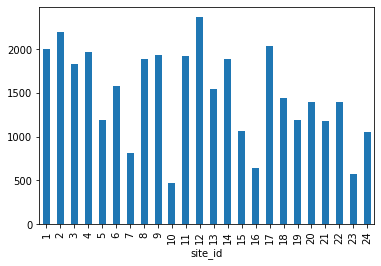

In [109]:
total_count = df.groupby('site_id')['record_id'].nunique()  # nunique -> exclude NA value
# Let's plot that too
total_count.plot(kind='bar')

# Extra Plotting Challenge

1. Create a plot of average weight across all species per plot.

2. Create a plot of total males versus total females for the entire dataset.

3. Create a stacked bar plot, with weight on the Y axis, and the stacked variable being sex. The plot should show total weight by sex for each site. Some tips are below to help you solve this challenge

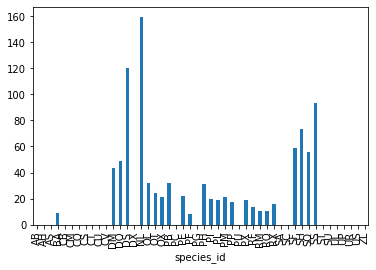

In [110]:
# 1. Create a plot of average weight across all species per plot.
surveys_df.groupby('species_id').mean()["weight"].plot(kind='bar')

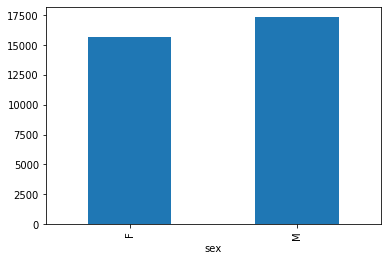

In [111]:
# 2. Create a plot of total males versus total females for the entire dataset.
surveys_df.groupby('sex').count()["record_id"].plot(kind='bar')

In [112]:
# 3 Explaination
d = {'one' : [1., 2., 3.,4.],'two' : [1., 2., 3., 4.]}
df_tmp = pd.DataFrame(data=d, index=['a', 'b', 'c', 'd'])

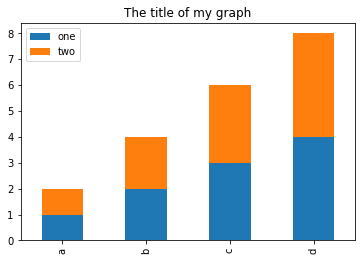

In [113]:
# plot stacked data so columns 'one' and 'two' are stacked
df_tmp.plot(kind='bar',stacked=True,title="The title of my graph")

In [114]:
df2 = surveys_df.groupby(['site_id','sex'])["weight"].sum().unstack()

Text(0.5, 0, 'Site')

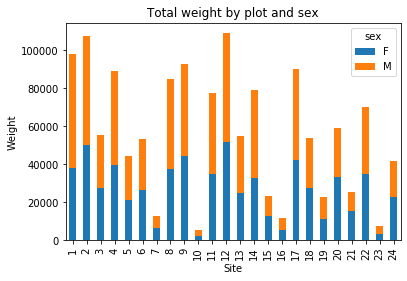

In [115]:
s_plot = df2.plot(kind='bar',stacked=True,title="Total weight by plot and sex")
s_plot.set_ylabel("Weight")
s_plot.set_xlabel("Site")